<a href="https://colab.research.google.com/github/jiyoung37/Plant-disease-recognition/blob/main/5_E_CNN_3x_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import

**1.1 Import kagglehub and download dataset**

In [ ]:
!pip install kagglehub
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [02:02<00:00, 23.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


**1.2 Define the paths**

In [ ]:
import os

# Define the dataset path
root_folder = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

data_dir = os.path.join(root_folder, 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/')

test_path = os.path.join(root_folder, 'test/test')
train_path = os.path.join(data_dir, 'train')
valid_path = os.path.join(data_dir, 'valid')

# Count the number of folders in a directory
def count_folders(path):
    if os.path.exists(path):
        return len([d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Count the number of files in a directory
def count_files(path):
    if os.path.exists(path):
        return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Function to count files in each folder of a given directory
def count_files_in_folders(path):
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        return {}

    folder_file_counts = {}
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            folder_file_counts[folder] = file_count

    return folder_file_counts

# Print counts
print(f"Number of folders in train_path: {count_folders(train_path)}")
print(f"Number of folders in valid_path: {count_folders(valid_path)}")
print(f"Number of files in test_path: {count_files(test_path)}")
print('-------------------------------------------------------------------')
# Count files in each folder
train_folder_counts = count_files_in_folders(train_path)
valid_folder_counts = count_files_in_folders(valid_path)
# Display results
print("Files in each folder (train_path):")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nFiles in each folder (valid_path):")
for folder, count in valid_folder_counts.items():
    print(f"{folder}: {count} files")

Number of folders in train_path: 38
Number of folders in valid_path: 38
Number of files in test_path: 33
-------------------------------------------------------------------
Files in each folder (train_path):
Apple___Apple_scab: 2016 files
Pepper,_bell___Bacterial_spot: 1913 files
Corn_(maize)___Common_rust_: 1907 files
Strawberry___Leaf_scorch: 1774 files
Pepper,_bell___healthy: 1988 files
Tomato___Spider_mites Two-spotted_spider_mite: 1741 files
Peach___healthy: 1728 files
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961 files
Grape___Esca_(Black_Measles): 1920 files
Tomato___Early_blight: 1920 files
Cherry_(including_sour)___Powdery_mildew: 1683 files
Corn_(maize)___healthy: 1859 files
Soybean___healthy: 2022 files
Strawberry___healthy: 1824 files
Apple___Cedar_apple_rust: 1760 files
Tomato___Septoria_leaf_spot: 1745 files
Tomato___Bacterial_spot: 1702 files
Grape___Black_rot: 1888 files
Cherry_(including_sour)___healthy: 1826 files
Potato___Late_blight: 1939 files
Corn_(maize)___Norther

# 2. Importing necessary libraries for Modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

import tensorflow as tf
# Check GPU availability
if tf.config.list_physical_devices('GPU'):
    print("OK! GPU is available and ready for use!")
else:
    print("NO! GPU not found. Falling back to CPU.")

import PIL
import scipy

print(PIL.__version__)
print(scipy.__version__)

OK! GPU is available and ready for use!
11.1.0
1.13.1


# Model 2: CNN with 3x Conv2D

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os
#import math

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50

# Define paths
train_path = train_path #train_path
valid_path = valid_path

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

val_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

# Build the CNN model with 2x Conv2D
model = Sequential([
    Input(shape=(224, 224, 3)), # manual IMG_SIZE
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
callbacks = [
    #EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    verbose = 1
)
# Visualize training performance
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 170s 73ms/step - accuracy: 0.5015 - loss: 1.9269 - val_accuracy: 0.8576 - val_loss: 0.4898
Epoch 2/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 152s 69ms/step - accuracy: 0.8041 - loss: 0.6488 - val_accuracy: 0.9003 - val_loss: 0.3266
Epoch 3/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 68ms/step - accuracy: 0.8736 - loss: 0.4071 - val_accuracy: 0.9193 - val_loss: 0.2617
Epoch 4/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.9106 - loss: 0.2819 - val_accuracy: 0.9278 - val_loss: 0.2381
Epoch 5/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.9367 - loss: 0.1963 - val_accuracy: 0.9353 - val_loss: 0.2056
Epoch 6/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 148s 67ms/step - accuracy: 0.9536 - loss: 0.1442 - val_accuracy: 0.9402 - val_loss: 0.1934
Epoch 7/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.9633 - loss: 0.1131 - val_accuracy: 0.9410 - val_loss: 0.1942
Epoch 8/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.9714 - lo

Plot accuracies & loss over epochs

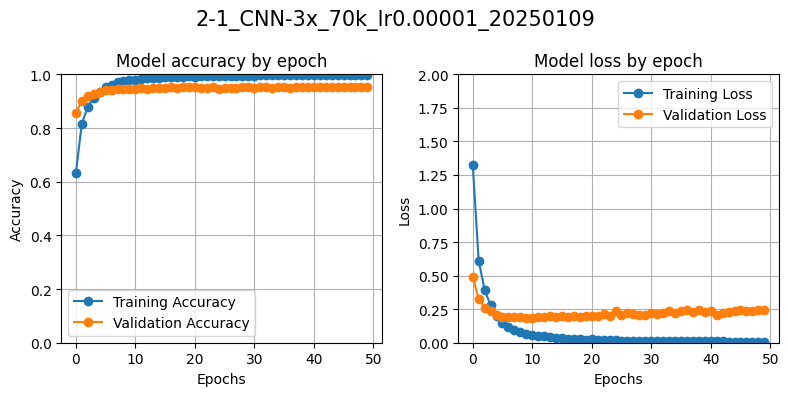

In [ ]:
Model_name = '2-1_CNN-3x_70k_lr0.00001_20250109'

fig= plt.figure(figsize=(8,4))
fig.suptitle(Model_name, fontsize=15)

# Plot accuracy
plt.subplot(121)
plt.plot(train_acc, label='Training Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='o')
plt.title('Model accuracy by epoch')
plt.xlabel('Epochs')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot loss
plt.subplot(122)
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Model loss by epoch')
plt.xlabel('Epochs')
plt.ylim([0,2])
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Prediction & Classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
# Generate predictions for validation set
val_pred = model.predict(val_generator)
val_pred_classes = np.argmax(val_pred, axis=1)
true_classes = val_generator.classes

# Classification report
class_report = classification_report(true_classes, val_pred_classes)
print("Classification Report:\n", class_report)

550/550 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       504
           1       0.95      0.97      0.96       497
           2       0.92      0.99      0.96       440
           3       0.95      0.94      0.95       502
           4       0.94      0.98      0.96       454
           5       0.99      0.99      0.99       421
           6       0.97      0.99      0.98       456
           7       0.97      0.83      0.89       410
           8       0.99      1.00      0.99       477
           9       0.86      0.97      0.91       477
          10       0.99      1.00      0.99       465
          11       0.97      0.95      0.96       472
          12       0.96      0.97      0.97       480
          13       0.98      1.00      0.99       430
          14       0.99      0.99      0.99       423
          15       0.97      1.00      0.99       503
          16  

Confusion matrix

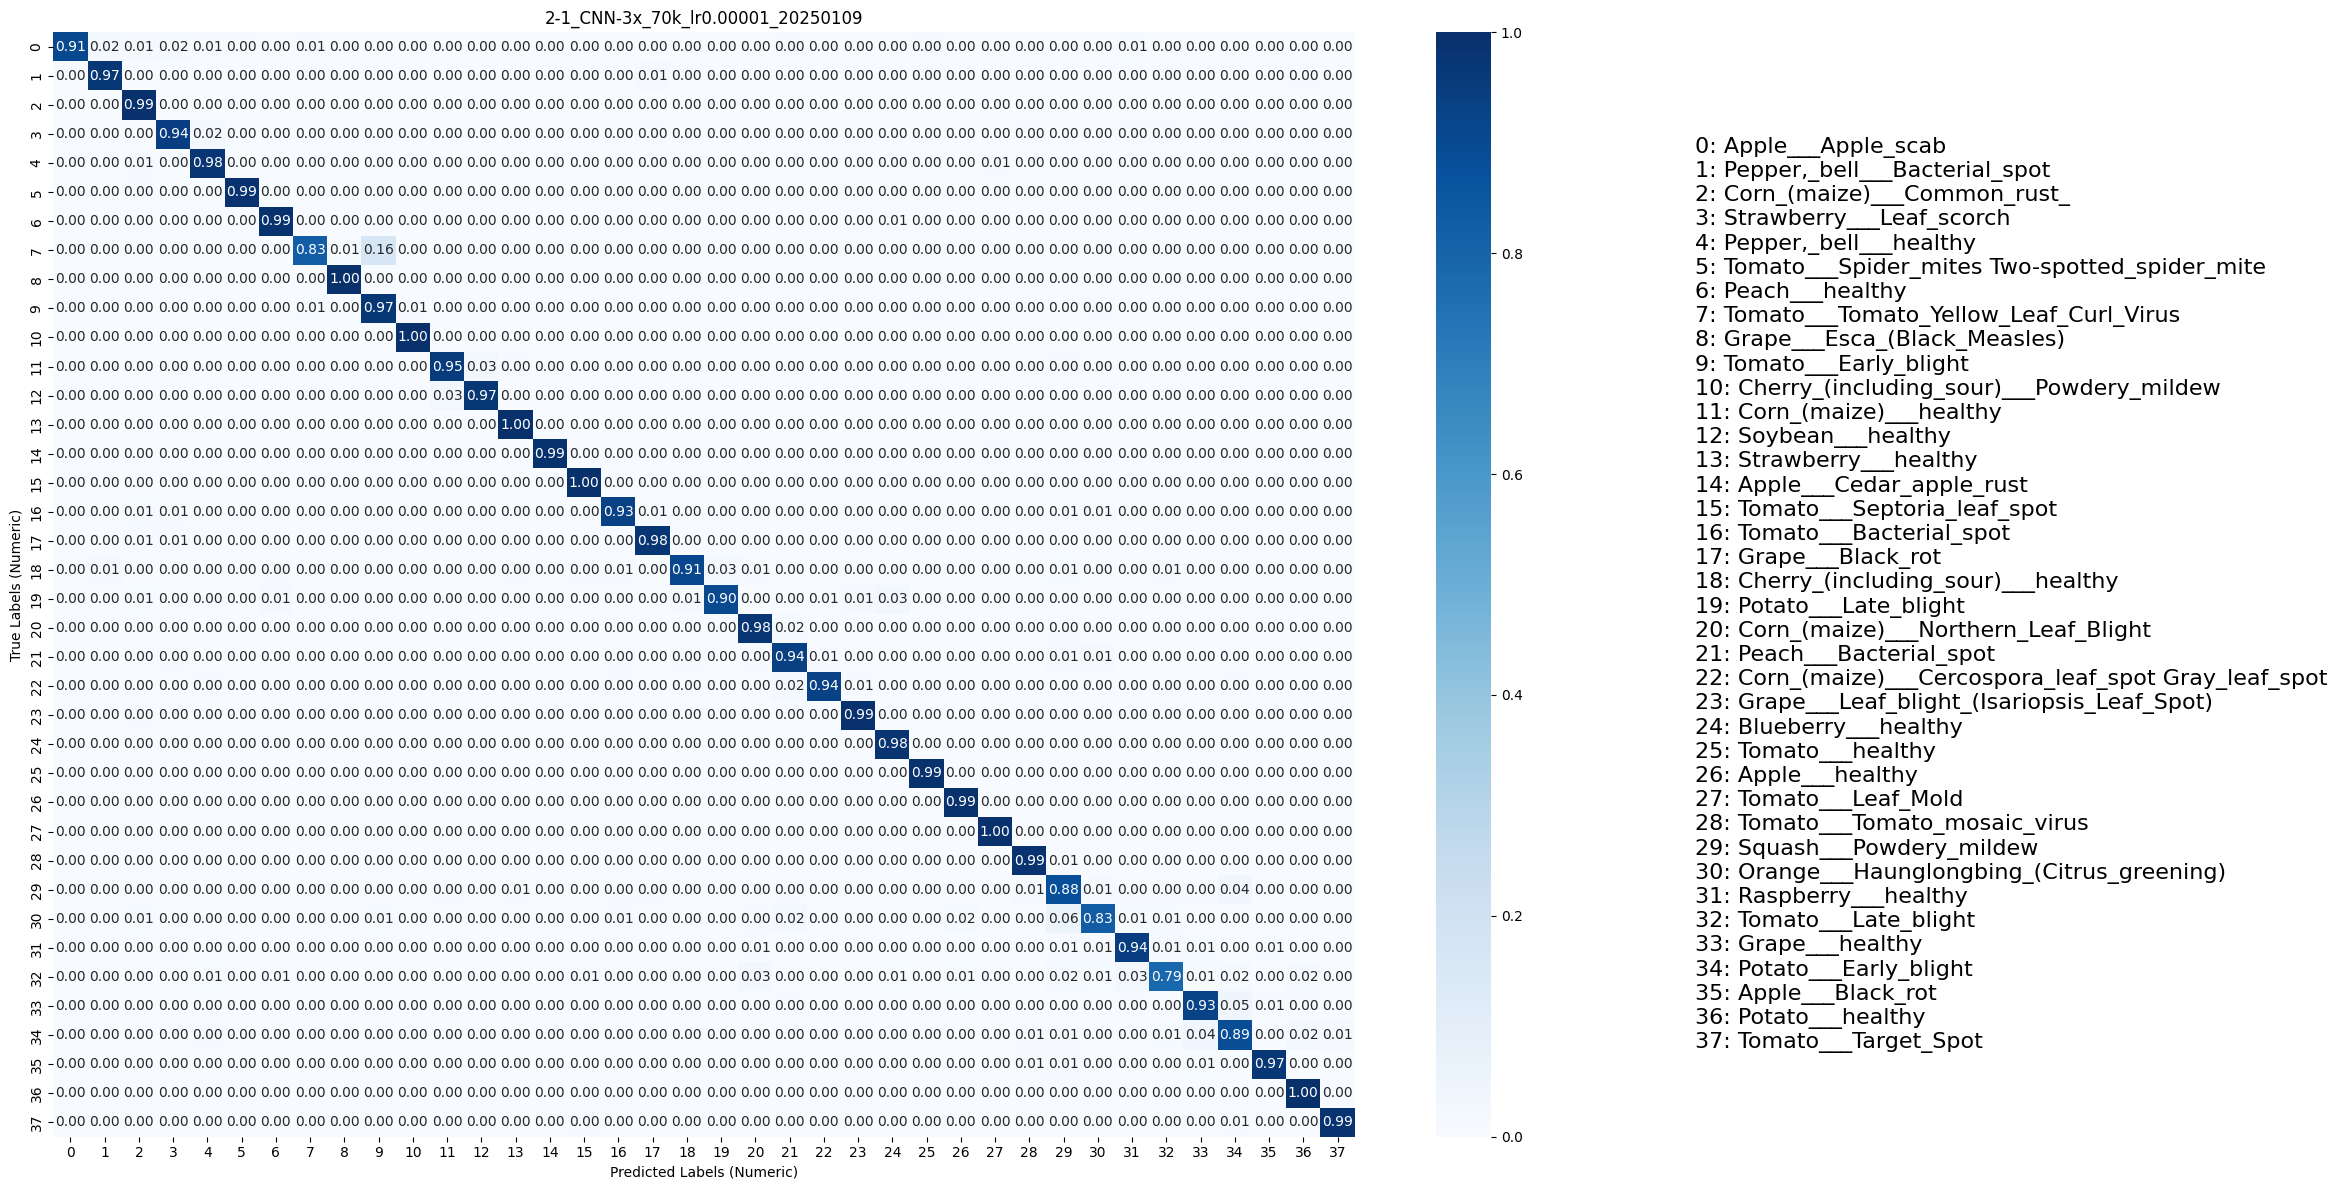

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix (y_true, y_pred, class_names, normalize=False, title=Model_name):
    """
    Plots a heatmap for the confusion matrix with numeric axis labels and a separate legend.

    Parameters:
    - y_true: Array of true labels
    - y_pred: Array of predicted labels
    - class_names: List of class names (for the legend)
    - normalize: If True, normalizes the confusion matrix
    - title: Title for the heatmap
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the heatmap
    plt.figure(figsize=(17, 12))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap='Blues', cbar=True,
                xticklabels=range(len(class_names)), yticklabels=range(len(class_names)))
    plt.title(title)
    plt.ylabel('True Labels (Numeric)')
    plt.xlabel('Predicted Labels (Numeric)')
    plt.tight_layout()

    # Add a legend for the class names
    plt.gcf().text(1, 0.5,
                   "\n".join([f"{i}: {name}" for i, name in enumerate(class_names)]),
                   fontsize=16, verticalalignment='center', horizontalalignment='left')

    plt.show()

# Extract class names
class_names = [folder_name for folder_name in os.listdir(valid_path) if os.path.isdir(os.path.join(valid_path, folder_name))]
#print("Class Names:", class_names)

plot_confusion_matrix(true_classes, val_pred_classes, class_names, normalize=True)




# Save model

In [ ]:
!ls


sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
save_dir = "/content/drive/MyDrive/DataScientist_Projects/1_Plant_Recognition_Project/Models"
model.save(f"{save_dir}/{Model_name}.keras")

Mounted at /content/drive


# Evaluation on test folder

Load model from google drive

In [ ]:
from tensorflow.keras.models import load_model

Model_name = '1-3_CNN-2x_70k_lr0.00001_20250109'

save_dir = "/content/drive/MyDrive/DataScientist_Projects"
model_path = f"{save_dir}/{Model_name}.keras"

# Load the model
model = load_model(model_path)
print("Model loaded successfully!")

Model loaded successfully!


Evaluation on the test folder

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Define helper function to preprocess a single image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img) / 255.0               # Convert to array and rescale
    return img_array

# Load and preprocess all images from the test folder
def load_test_images(test_path, target_size):
    test_images = []
    filenames = []
    for file in os.listdir(test_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Supported file formats
            file_path = os.path.join(test_path, file)
            test_images.append(preprocess_image(file_path, target_size))
            filenames.append(file)  # Save filenames for reference
    return np.array(test_images), filenames

# Parameters
IMG_SIZE = (224, 224)  # Adjust to model's input size
test_path = test_path

# Load and preprocess test images
test_images, filenames = load_test_images(test_path, target_size=IMG_SIZE)

# Make Predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = train_generator.class_indices
class_indices = {v: k for k, v in class_labels.items()}  # Reverse mapping of class indices
predicted_labels = [class_indices[idx] for idx in predicted_classes]

# Print predictions with filenames
results = []

for file, pred, label in zip(filenames, predictions, predicted_labels):
    confidence = np.max(pred)  # Get the highest probability (confidence score)
    print(f"True class:{file}, Predictions:{label} (Confidence: {confidence:.2f})")

    # Pause and ask for feedback
    feedback = input("Is the prediction correct? (1 for Yes, 0 for No): ")
    if feedback == "1":
        results.append({"file": file, "prediction": label, "confidence": confidence, "Correct": "1"})
    else:
        results.append({"file": file, "prediction": label, "confidence": confidence, "Correct": "0"})


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 855ms/step
True class:AppleCedarRust1.JPG, Predictions:Apple___Cedar_apple_rust (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:AppleCedarRust3.JPG, Predictions:Apple___Cedar_apple_rust (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoYellowCurlVirus3.JPG, Predictions:Tomato___Early_blight (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 0
True class:PotatoEarlyBlight4.JPG, Predictions:Potato___Early_blight (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoEarlyBlight1.JPG, Predictions:Tomato___Early_blight (Confidence: 0.97)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoHealthy2.JPG, Predictions:Tomato___healthy (Confidence: 1.00)
Is the prediction correct? (1 for Yes, 0 for No): 1
True class:TomatoYellowCurlVirus2.JPG, Predictions:Tomato___Tomato_Yellow_Leaf_Curl_Virus (Confidence: 1.00)
Is the prediction

Create DataFrame and save as CSV in google drive

In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Print the DataFrame
print("\nSummary of Predictions and Feedback:")
display(df_results)

# Save DataFrame to CSV
output_csv_path = f"{save_dir}/predictions.csv"  # Specify the output file path
df_results.to_csv(output_csv_path, index=False)

print(f"Predictions have been saved to {output_csv_path}")


Summary of Predictions and Feedback:


,file,prediction,confidence,Correct
0,AppleCedarRust1.JPG,Apple___Cedar_apple_rust,0.999969,1
1,AppleCedarRust3.JPG,Apple___Cedar_apple_rust,0.999998,1
2,TomatoYellowCurlVirus3.JPG,Tomato___Early_blight,0.996312,0
3,PotatoEarlyBlight4.JPG,Potato___Early_blight,1.000000,1
4,TomatoEarlyBlight1.JPG,Tomato___Early_blight,0.972577,1
5,TomatoHealthy2.JPG,Tomato___healthy,0.999973,1
6,TomatoYellowCurlVirus2.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.000000,1
7,TomatoEarlyBlight6.JPG,Tomato___Early_blight,0.581921,1
8,AppleCedarRust4.JPG,Tomato___Bacterial_spot,0.999349,0
9,TomatoEarlyBlight3.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.986377,0


Predictions have been saved to /content/drive/MyDrive/DataScientist_Projects/1_Plant_Recognition_Project/Models/predictions.csv


Prediction accuracy

In [ ]:
df_results["Correct"].value_counts(normalize=True)

,proportion
Correct,
1,0.848485
0,0.151515
